In [1]:
import deepSI
from matplotlib import pyplot as plt
train, test = deepSI.datasets.WienerHammerBenchMark(split_data=True)
from encoder_LPV_models import LPV_multi_encoder, LPV_single_encoder

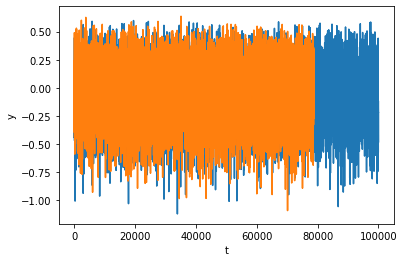

In [3]:
train.plot()
test.plot(show=True)

In [ ]:
#########################################################
# LPV-SUBNET with six states and one scheduling parameter
#########################################################

In [6]:
sys = LPV_single_encoder(nx=6, Np=1, na=20, nb=20, feedthrough=True, include_u_in_p=True, f_net_kwargs=dict(F=10), \
                        e_net_kwargs=dict(n_nodes_per_layer = 16, n_hidden_layers = 1), \
                        p_net_kwargs=dict(n_nodes_per_layer = 16, n_hidden_layers = 1))
sys.init_model(sys_data=train, optimizer_kwargs=dict(lr = 1e-02))

In [ ]:
sys.fit(train[:70000], train[-30000:], epochs = 100, loss_kwargs=dict(nf=80, loss_nf_cutoff=2))
sys.fit(train, train[-30000:], epochs = 1000, loss_kwargs=dict(nf=120, loss_nf_cutoff=2))
sys.fit(train, train[-40000:], epochs = 1000, batch_size = 1000, loss_kwargs=dict(nf=150, loss_nf_cutoff=2))
sys.fit(train, train[-40000:], epochs = 1000, batch_size = 2000, loss_kwargs=dict(nf=200, loss_nf_cutoff=2))
sys.fit(train, train[-40000:], epochs = 1000, batch_size = 5000, loss_kwargs=dict(nf=200, loss_nf_cutoff=2))

In [7]:
sys = deepSI.load_system('results/wh_nx6_np1_na20_nb20')

In [8]:
res = sys.apply_experiment(test)
print("Test RMS: " + str(res.RMS(test) * 1000) + " mV")
print("Test NRMS: " + str(res.NRMS(test) * 100) + "%")

Test RMS: 1.1576134893769106 mV
Test NRMS: 0.47470943158268963%


In [ ]:
###########################################################
# LPV-SUBNET with six states and three scheduling parameter
###########################################################

In [9]:
sys = LPV_single_encoder(nx=6, Np=3, na=20, nb=20, feedthrough=True, include_u_in_p=True, f_net_kwargs=dict(F=10), \
                        e_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1), \
                        p_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1))
sys.init_model(sys_data=train, optimizer_kwargs=dict(lr = 1e-03))

In [ ]:
sys.fit(train, train[-30000:], epochs = 10000, loss_kwargs=dict(nf=80, loss_nf_cutoff=2))

In [2]:
sys = deepSI.load_system('results/wh_nx6_np3_na20_nb20')

In [3]:
res = sys.apply_experiment(test)
print("Test RMS: " + str(res.RMS(test) * 1000) + " mV")
print("Test NRMS: " + str(res.NRMS(test) * 100) + "%")

Test RMS: 0.6932944390774695 mV
Test NRMS: 0.2843033638723851%


In [ ]:
name1 = "results/wh_out.m"
name2 = "results/wh_real_out.m"

logY = res.y
logYR = test.y
with open(name1, "w+") as f:
    f.write("y = [" + str(logY[0]) + ",\n")
    for i in range(1, logY.size - 1):
        f.write(str(logY[i]) + ",\n")
    f.write(str(logY[logY.size - 1]) + "];\n")

with open(name2, "w+") as f:
    f.write("yr = [" + str(logYR[0]) + ",\n")
    for i in range(1, logY.size - 1):
        f.write(str(logYR[i]) + "\n")
    f.write(str(logYR[logY.size - 1]) + "];\n")